<a href="https://colab.research.google.com/github/makkimaki/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/main/Chapter4_TheGreatestTheoremNeverTold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 大数の法則
略

In [1]:
!pip install japanize-matplotlib
!pip install seaborn==0.12
!pip install numpyro
!pip install 'pymc>=5.9'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
# from IPython.display import display
import seaborn as sns
import pymc as pm
import arviz as az
import scipy
import scipy.stats as stats
from numpy.random import multinomial
import matplotlib as mtl
mtl.style.use("ggplot")

print(f"{pm.__version__=}")
print(f"{sns.__version__=}")
print(f"{np.__version__=}")
print(f"{scipy.__version__=}")
np.set_printoptions(precision=3, floatmode="fixed")
plt.rcParams["font.size"] = 8
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.grid"] = True
# pd.options.display.float_format = "[:.3f]".format
pd.set_option("display.max_columns", None)

pm.__version__='5.10.4'
sns.__version__='0.12.0'
np.__version__='1.25.2'
scipy.__version__='1.11.4'


## 例題：ポアソン分布に従う確率変数の収束
- ポアソン分布に従う確率変数の３つのデータ列
- 大数の法則に従う様子を見る
- $\lambda$=4.5, $sample_size$=100000
- $n$: 1から`sample_size`まで変えて、$n$サンプルの平均をプロット

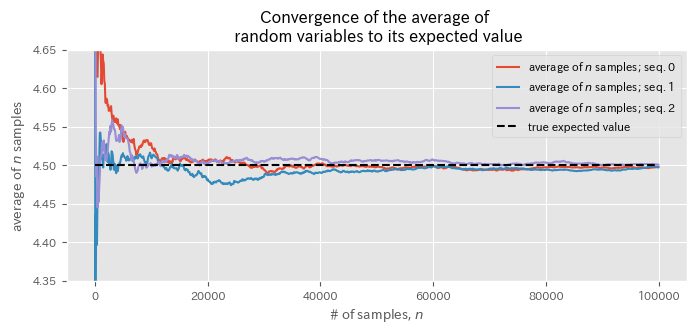

CPU times: user 801 ms, sys: 132 ms, total: 933 ms
Wall time: 837 ms


In [3]:
%%time

sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1, sample_size, 100)

plt.figure(figsize=(8, 3))
for k in range(3):
    samples = poi(lambda_, sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]

    plt.plot(N_samples, partial_average, lw=1.5, label=f"average of $n$ samples; seq. {k}")
plt.plot(N_samples, expected_value*np.ones_like(partial_average),
         ls="--",
         label="true expected value",
         c="k")
plt.ylim(4.35, 4.65)
plt.title("Convergence of the average of \n random variables to its expected value")
plt.ylabel("average of $n$ samples")
plt.xlabel("# of samples, $n$")
plt.legend()
plt.show()

## 例題：Redditコメントのソート
- ネット通販サイトのレーティング
    - 平均が★５でも、評価者が1人しかいない商品をどれくらい信頼できる？二人なら？三人なら？
- アイテムをソートするときに、★の順番で並び替えても期待した結果は得られない、ということを多くの人が気づいている。
- 本当に価値があるのは、評価者が多く、★4.8ぐらいの商品なのでそれらはトップに出てこない。どうすればいい？

## Reddit: 文章や画像へのリンクサイトでコメントが付けられる
- 各コメントへupvote, downvoteを投票できる
- **どのコメントがベストかどうやって決められるか？**
1. 人気度：upvoteの多さ。しかしdownvoteも同時に多ければ考え物
2. 投票の差：upvoteとdownvoteの差。
3. 時間調整：「投票の差」／「コメントの古さ」。
4. 比率：upvote, downvoteの比率。

まずは、upvote比率と、投票の絶対数のバランスが気になるところ。

### upvote比率の事前分布の決める方法論を考えるうえで注目するべきポイント
- 大多数のコメントはupvote/downvoteがない➡コメントのupvote率を見たら、0が非常に多くなるはず（歪み）
- Redditはカテゴリに分けられてsubredditが運用されている。「政治」と「動物の写真」ではupvoteのつき方が大きく変わるはず。

じゃあ何をpriorに使うか？  
➡**一様分布**


In [4]:
!pip install praw==3.6.0

In [8]:
import os
from urllib.request import urlretrieve
import praw
print(f"{praw.__version__=}")

os.makedirs("data", exist_ok=True)
print(os.listdir())
urlretrieve("https://git.io/vXtX2", "top_showerthoughts_submissions.py")

praw.__version__='3.6.0'
['.config', 'top_showerthoughts_submissions.py', 'data', 'sample_data']


('top_showerthoughts_submissions.py',
 <http.client.HTTPMessage at 0x7c88c8e50550>)

In [9]:
import os

print(os.listdir())

['.config', 'top_showerthoughts_submissions.py', 'data', 'sample_data']


In [10]:
%run top_showerthoughts_submissions.py 2

print("Title of submission:")
print(top_post)

TypeError: BaseReddit.__init__() got multiple values for argument 'user_agent'

Title of submission:
